In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import  PartialDependenceDisplay,permutation_importance
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree
import seaborn as sns
%matplotlib inline

# Load the dataset
data = pd.read_csv('day.csv')

# Select relevant features and target
features = ['hum','temp', 'windspeed']
target = 'cnt'
X = data.loc[:,'season':'windspeed']
y = data['cnt']  # Target is count of bike rentals

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled= pd.DataFrame(scaler.transform(X_test), columns=X.columns)

hum_s:0.17
temp_s:0.79
windspeed_s:0.05


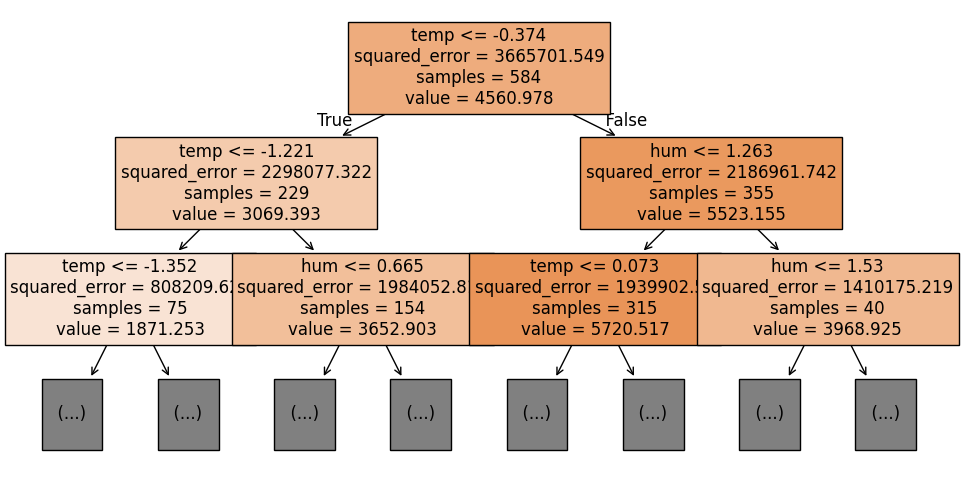

In [2]:
#Fit a model
dt_reg = DecisionTreeRegressor(max_depth=5)
dt_reg.fit(X_train_scaled[features], y_train)

# Print the feature importances
for coef, feature in zip(dt_reg.feature_importances_, features):
    print(f'{feature}_s:{coef:.2f}')

# Plot the tree
plt.figure(figsize=(12, 6))
plot_tree(dt_reg, feature_names=features, filled=True, max_depth=2, fontsize=12)
plt.show()

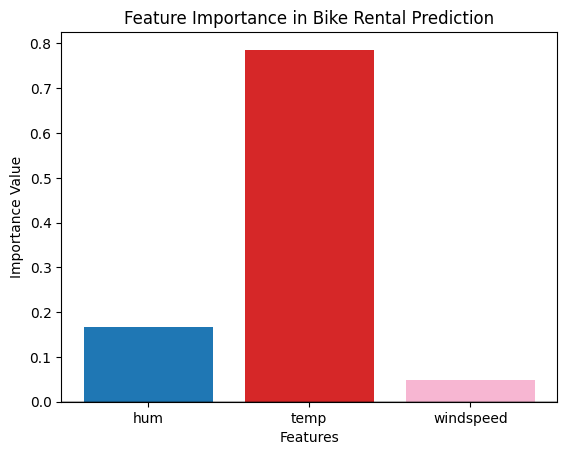

In [4]:
importances = dt_reg.feature_importances_
features = dt_reg.feature_names_in_

bars = plt.bar(features, importances, color=[plt.cm.tab20(i/len(features)) for i in range(len(features))])

# Add labels and title
plt.title('Feature Importance in Bike Rental Prediction')
plt.xlabel('Features')
plt.ylabel('Importance Value')

# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Show the plot
plt.show()

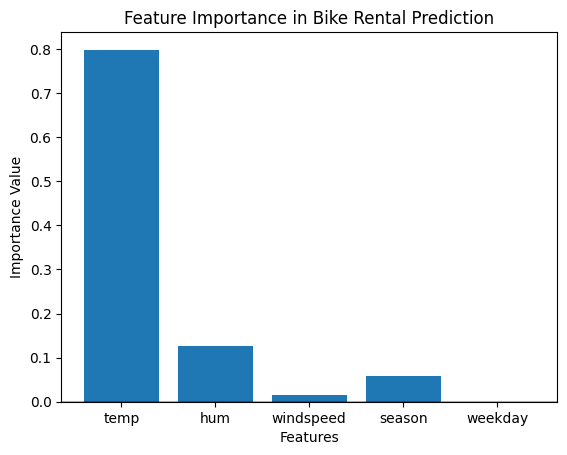

In [5]:
# Train new model
expanded_features = ['temp', 'hum', 'windspeed', 'season', 'weekday']

dt_reg_extended = DecisionTreeRegressor(max_depth=4, random_state=42)
dt_reg_extended.fit(X_train_scaled[expanded_features], y_train)

# Plot new feature importances
importances =dt_reg_extended.feature_importances_
features = dt_reg_extended.feature_names_in_

bars = plt.bar(features, importances)

# Add labels and title
plt.title('Feature Importance in Bike Rental Prediction')
plt.xlabel('Features')
plt.ylabel('Importance Value')

# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Show the plot
plt.show()

In [6]:
# Create comparison DataFrame
original_imp = pd.Series(dt_reg.feature_importances_, index=dt_reg.feature_names_in_, name='Original Model')
expanded_imp = pd.Series(dt_reg_extended.feature_importances_, index=dt_reg_extended.feature_names_in_, name='Expanded Model')

# Combine into a DataFrame
comparison_df = pd.concat([original_imp, expanded_imp],axis=1)

# Add absolute difference for common features
comparison_df['Absolute Difference'] = abs(
    comparison_df['Original Model'] - comparison_df['Expanded Model']
).round(3)

# Round all numeric values
comparison_df = comparison_df.round(3)

print("Coefficient Importance:")
print(comparison_df)

Coefficient Importance:
           Original Model  Expanded Model  Absolute Difference
hum                 0.167           0.127                0.039
temp                0.786           0.799                0.012
windspeed           0.047           0.016                0.031
season                NaN           0.058                  NaN
weekday               NaN           0.000                  NaN
